Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data

### Importing all the important libraries

In [1]:
# !pip show tensorflow

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
def visualizeClasses(dataset):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype(np.uint8))
            plt.title(class_names[i])
            plt.axis("off")

In [4]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataCset
data_dir_train = pathlib.Path('/content/gdrive/MyDrive/UpGrad/AI_ML/CNN_Melanoma_Dataset/Train')
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/UpGrad/AI_ML/CNN_Melanoma_Dataset/Test')

# using to run locally
#data_dir_train = pathlib.Path("/Users/nagavi@F-Secure.com/Skills/Melanoma_CNN/Dataset/Train")
#data_dir_test = pathlib.Path("/Users/nagavi@F-Secure.com/Skills/Melanoma_CNN/Dataset/Test")

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180
validation_split_value = 0.2
seed_value = 123

Use 80% of the images for training, and 20% for validation.

In [8]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
 #   labels="inferred",
  #  label_mode="categorical",
    batch_size=batch_size,
    image_size=(img_height, img_width),
    color_mode="rgb",
    shuffle=True,
    seed=seed_value,
    validation_split=validation_split_value,
    subset = "training",
    interpolation='bilinear',
    follow_links=False
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels="inferred",
   # label_mode="categorical",
    batch_size=batch_size,
    image_size=(img_height, img_width),
    color_mode="rgb",
    shuffle=True,
    seed=seed_value,
    validation_split=validation_split_value,
    subset = "validation",
    interpolation='bilinear',
    follow_links=False
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

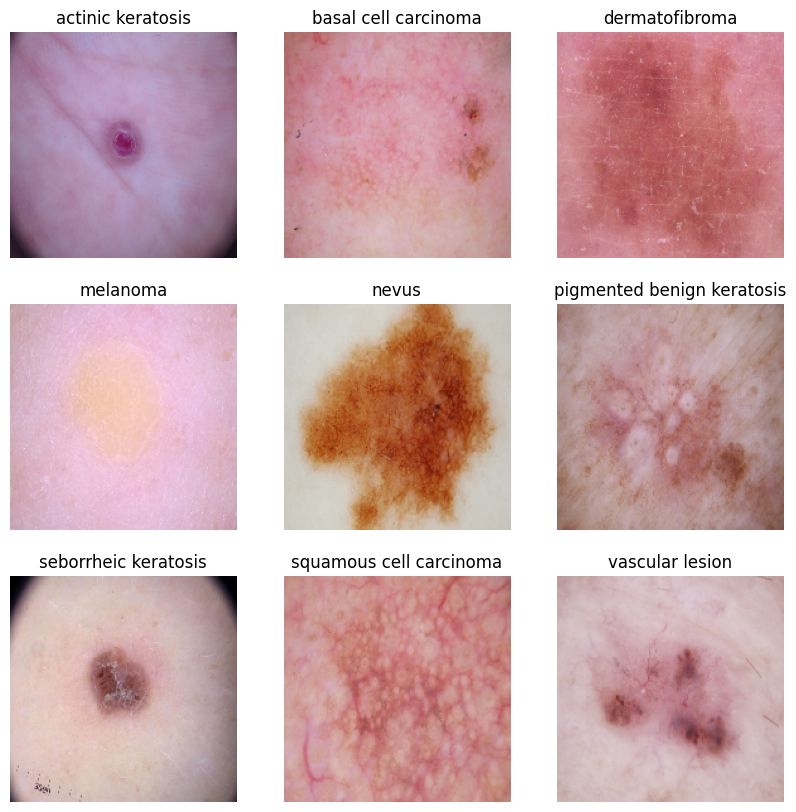

In [11]:
# Visualize training dataset class instances
visualizeClasses(train_ds)

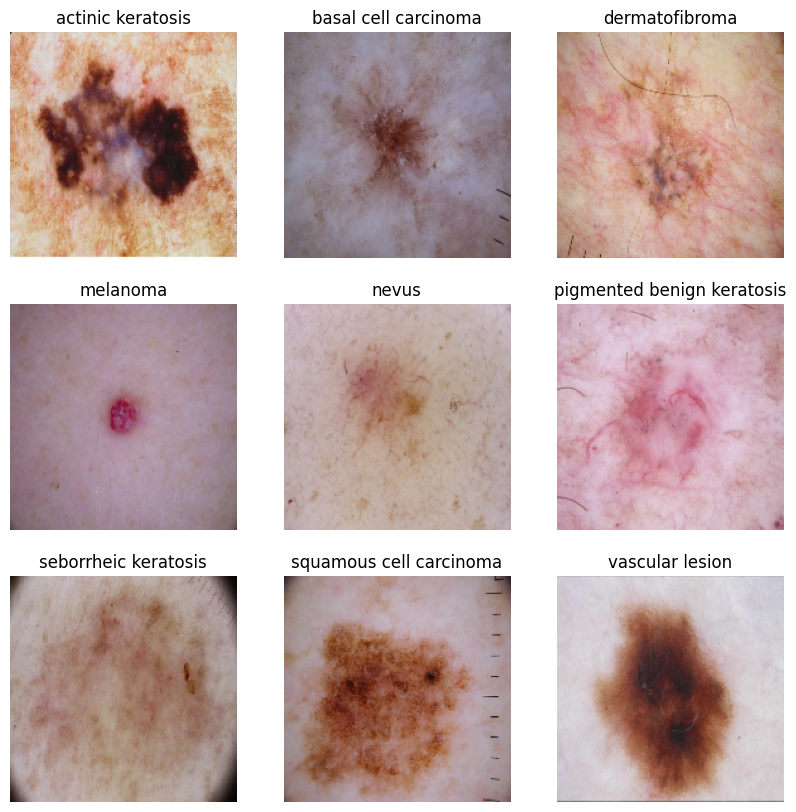

In [12]:
# Visualize training dataset class instances
visualizeClasses(val_ds)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`


### **Model 1: Vanilla Model**

In [14]:
### Your code goes here
num_classes = 9
padding_type = 'same'
activation_func = 'relu'

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(filters = 16, kernel_size = 3, padding=padding_type, activation=activation_func),
  layers.MaxPooling2D(),
  layers.Conv2D(filters=32, kernel_size=3, padding=padding_type, activation=activation_func),
  layers.MaxPooling2D(),
  layers.Conv2D(filters=64, kernel_size=3, padding=padding_type, activation=activation_func),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(units=128, activation=activation_func),
  layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [15]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [17]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 592s 1s/step - loss: 1.8588 - accuracy: 0.3181 - val_loss: 1.6816 - val_accuracy: 0.4519
Epoch 2/20
56/56 [==============================] - 1s 25ms/step - loss: 1.5978 - accuracy: 0.4414 - val_loss: 1.5276 - val_accuracy: 0.4765
Epoch 3/20
56/56 [==============================] - 1s 22ms/step - loss: 1.4649 - accuracy: 0.4760 - val_loss: 1.4197 - val_accuracy: 0.5190
Epoch 4/20
56/56 [==============================] - 1s 23ms/step - loss: 1.3822 - accuracy: 0.5151 - val_loss: 1.3873 - val_accuracy: 0.5257
Epoch 5/20
56/56 [==============================] - 1s 21ms/step - loss: 1.2711 - accuracy: 0.5547 - val_loss: 1.5136 - val_accuracy: 0.4765
Epoch 6/20
56/56 [==============================] - 1s 21ms/step - loss: 1.1746 - accuracy: 0.5859 - val_loss: 1.3641 - val_accuracy: 0.5123
Epoch 7/20
56/56 [==============================] - 1s 21ms/step - loss: 1.1232 - accuracy: 0.6021 - val_loss: 1.7361 - val_accuracy: 0.4340
Epoch 8/20
56

### Visualizing training results

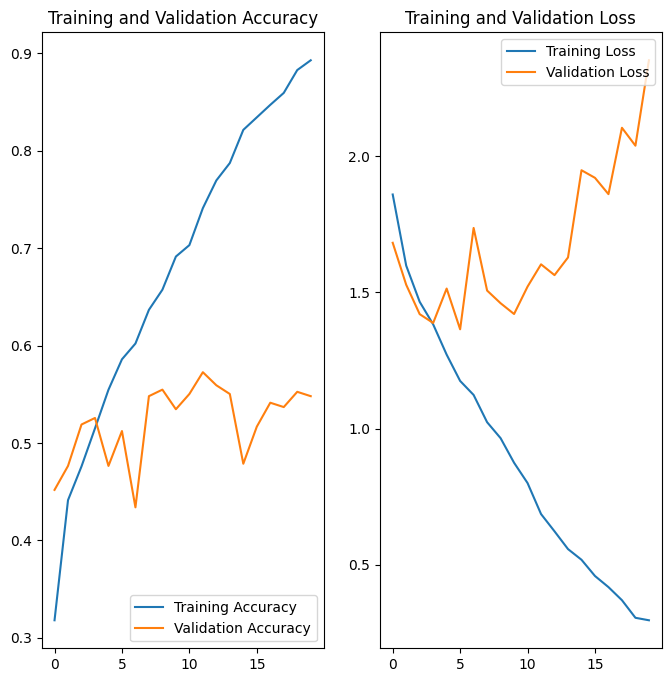

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

*   The training accuracy is around 89.29 and validation accuracy is around 54.81. This clearly shows that model is <b>overfitting</b> and thus will not be able to predict well on unseen data.

* Training accuracy of the model appears to increase linearly whereas validation accuracy remained stagnant between 47% to 53%.

* Such high training accuracy also points to the point that the model has learnt the noise in the data and low validation accuracy indicates that the model is not about to pick up general features among the dataset


In [19]:
# augment the dataset by flipping the images
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

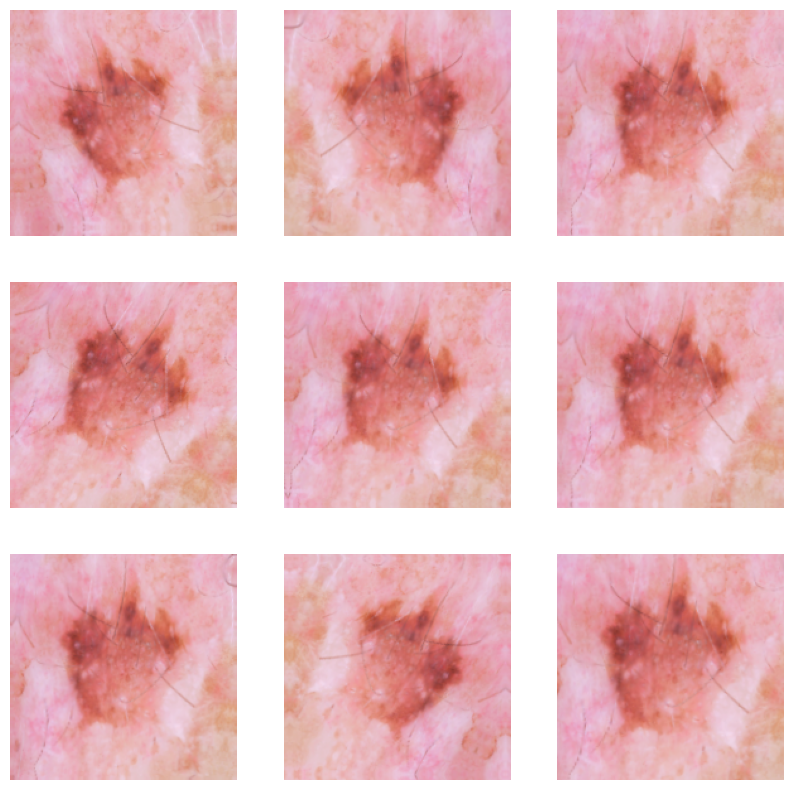

In [20]:
# visualize how your augmentation strategy works for one instance of training image.
# visualize the augmented dataset - Training
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

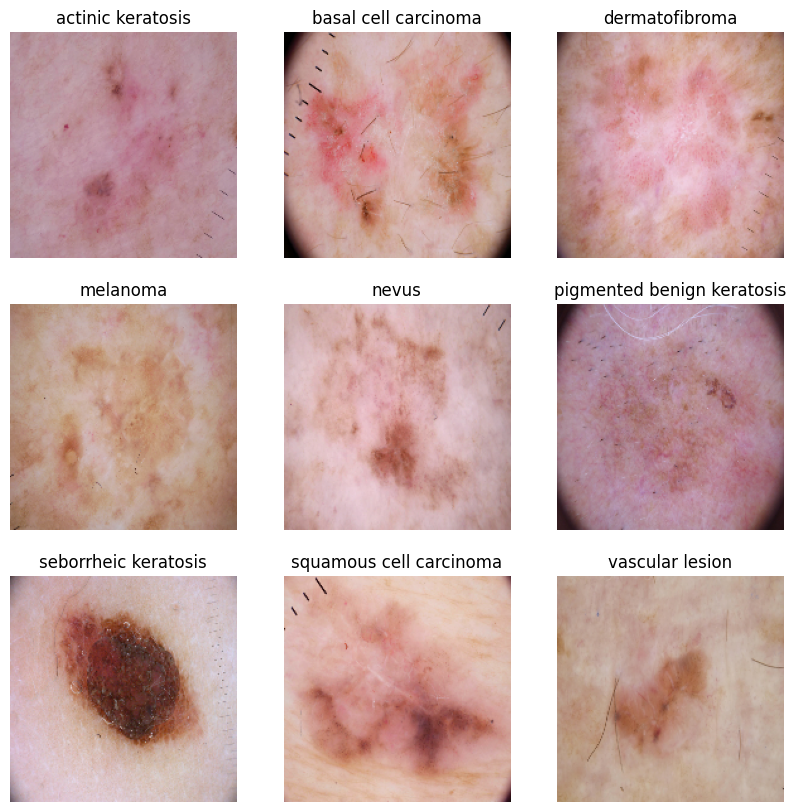

In [21]:
# visualize one instance of each class after augmentation - Training dataset
visualizeClasses(train_ds)

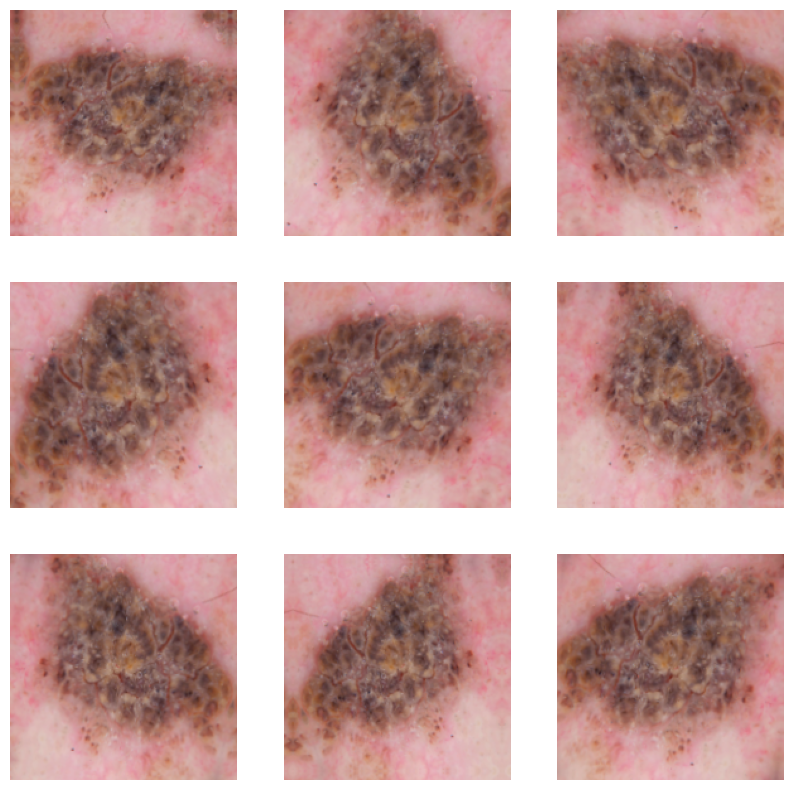

In [22]:
# visualize the augmented dataset - validation
class_names
plt.figure(figsize=(10, 10))
for images, _ in val_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

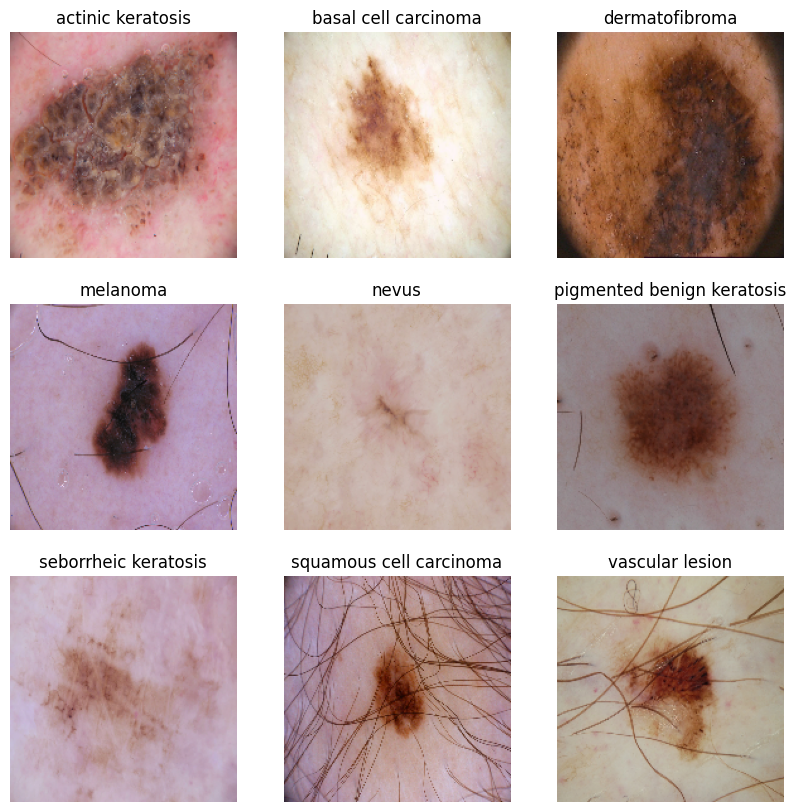

In [23]:
# visualize one instance of each class after augmentation - Validation dataset
visualizeClasses(val_ds)

### Create the model, compile and train the model

### **Model 2: Vanilla Model + Dropout Layer + Data Augmentation (to counter overfitting)**

In [24]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
# Add dropout layer
num_classes = 9
padding_type = 'same'
activation_func = 'relu'

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(filters = 16, kernel_size = 3, padding=padding_type, activation=activation_func),
  layers.MaxPooling2D(),
  layers.Conv2D(filters=32, kernel_size=3, padding=padding_type, activation=activation_func),
  layers.MaxPooling2D(),
  layers.Conv2D(filters=64, kernel_size=3, padding=padding_type, activation=activation_func),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(units=128, activation=activation_func),
  layers.Dense(num_classes)
])

### Compiling the model

In [25]:
## Compile code - with dropout layer
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

### Training the model

In [27]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 6s 32ms/step - loss: 2.0173 - accuracy: 0.2656 - val_loss: 1.7965 - val_accuracy: 0.3289
Epoch 2/20
56/56 [==============================] - 2s 27ms/step - loss: 1.6494 - accuracy: 0.4129 - val_loss: 1.4758 - val_accuracy: 0.5101
Epoch 3/20
56/56 [==============================] - 2s 28ms/step - loss: 1.4877 - accuracy: 0.4732 - val_loss: 1.4541 - val_accuracy: 0.5213
Epoch 4/20
56/56 [==============================] - 1s 27ms/step - loss: 1.3960 - accuracy: 0.5061 - val_loss: 1.4847 - val_accuracy: 0.4631
Epoch 5/20
56/56 [==============================] - 2s 27ms/step - loss: 1.3321 - accuracy: 0.5318 - val_loss: 1.4163 - val_accuracy: 0.5034
Epoch 6/20
56/56 [==============================] - 2s 28ms/step - loss: 1.2435 - accuracy: 0.5619 - val_loss: 1.4394 - val_accuracy: 0.5034
Epoch 7/20
56/56 [==============================] - 2s 29ms/step - loss: 1.2634 - accuracy: 0.5642 - val_loss: 1.3853 - val_accuracy: 0.5324
Epoch 8/20
56

### Visualizing the results

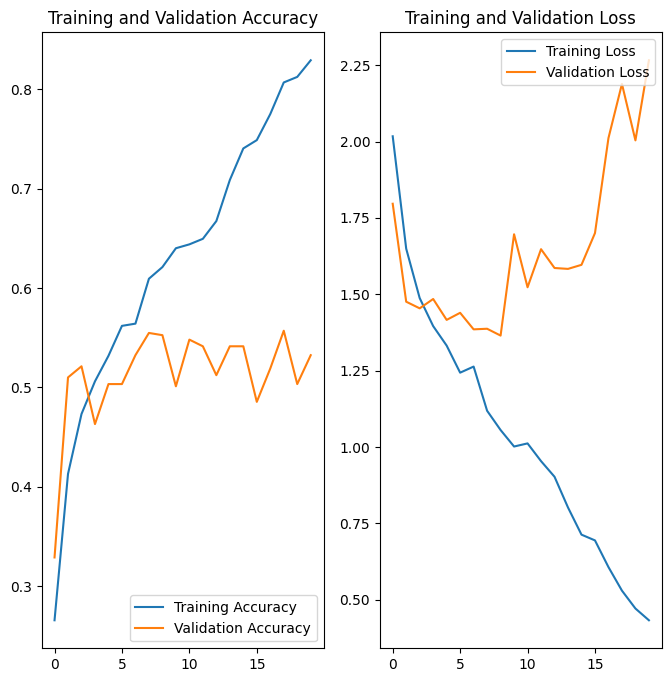

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?





*   The training accuracy is reduced compared to the previous model. The accuracy is around 82.92
*   The validation accuracy is around 53.24
*   The difference between training accuracy & validation accuracy is reduced but we have to increase both accuracies by adding more dataset








#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [30]:
temp_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels="inferred",
    label_mode="categorical",
    batch_size=2239,
    image_size=(180, 180),
    shuffle=True,
    seed=123
)

Found 2239 files belonging to 9 classes.


In [31]:
for images, labels in temp_train_ds:
    temp = labels.numpy()

In [32]:
data = pd.DataFrame(temp,columns=class_names)

In [33]:
# display the data
data

actinic keratosis  basal cell carcinoma  dermatofibroma  melanoma  \
0                   0.0                   0.0             0.0       0.0   
1                   0.0                   0.0             0.0       1.0   
2                   0.0                   0.0             0.0       0.0   
3                   0.0                   0.0             0.0       0.0   
4                   0.0                   0.0             0.0       1.0   
...                 ...                   ...             ...       ...   
2234                0.0                   0.0             0.0       0.0   
2235                0.0                   0.0             0.0       0.0   
2236                0.0                   0.0             0.0       1.0   
2237                0.0                   0.0             0.0       0.0   
2238                0.0                   0.0             0.0       1.0   

      nevus  pigmented benign keratosis  seborrheic keratosis  \
0       1.0                         0.0                   0.0   
1       0.0                         0.0                   0.0   
2       0.0                         1.0                   0.0   
3       0.0                         1.0                   0.0   
4       0.0                         0.0                   0.0   
...     ...                         ...                   ...   
2234    0.0                         1.0                   0.0   
2235    0.0                         1.0                   0.0   
2236    0.0                         0.0                   0.0   
2237    0.0                         0.0                   0.0   
2238    0.0                         0.0                   0.0   

      squamous cell carcinoma  vascular lesion  
0                         0.0              0.0  
1                         0.0              0.0  
2                         0.0              0.0  
3                         0.0              0.0  
4                         0.0              0.0  
...                       ...              ...  
2234                      0.0              0.0  
2235                      0.0              0.0  
2236                      0.0              0.0  
2237                      1.0              0.0  
2238                      0.0              0.0  

[2239 rows x 9 columns]

In [34]:
# display the details for each class
for col in data.columns:
    print(f"{col}\n", data[col].value_counts(ascending=True))
    print('---------------------------------------')

actinic keratosis
 1.0     114
0.0    2125
Name: actinic keratosis, dtype: int64
---------------------------------------
basal cell carcinoma
 1.0     376
0.0    1863
Name: basal cell carcinoma, dtype: int64
---------------------------------------
dermatofibroma
 1.0      95
0.0    2144
Name: dermatofibroma, dtype: int64
---------------------------------------
melanoma
 1.0     438
0.0    1801
Name: melanoma, dtype: int64
---------------------------------------
nevus
 1.0     357
0.0    1882
Name: nevus, dtype: int64
---------------------------------------
pigmented benign keratosis
 1.0     462
0.0    1777
Name: pigmented benign keratosis, dtype: int64
---------------------------------------
seborrheic keratosis
 1.0      77
0.0    2162
Name: seborrheic keratosis, dtype: int64
---------------------------------------
squamous cell carcinoma
 1.0     181
0.0    2058
Name: squamous cell carcinoma, dtype: int64
---------------------------------------
vascular lesion
 1.0     139
0.0    21

In [35]:
# display the different class names
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [36]:
# display the details for each class
for col in data.columns:
    print(f"{col}\n", data[col].value_counts(ascending=True))
    print('---------------------------------------')

actinic keratosis
 1.0     114
0.0    2125
Name: actinic keratosis, dtype: int64
---------------------------------------
basal cell carcinoma
 1.0     376
0.0    1863
Name: basal cell carcinoma, dtype: int64
---------------------------------------
dermatofibroma
 1.0      95
0.0    2144
Name: dermatofibroma, dtype: int64
---------------------------------------
melanoma
 1.0     438
0.0    1801
Name: melanoma, dtype: int64
---------------------------------------
nevus
 1.0     357
0.0    1882
Name: nevus, dtype: int64
---------------------------------------
pigmented benign keratosis
 1.0     462
0.0    1777
Name: pigmented benign keratosis, dtype: int64
---------------------------------------
seborrheic keratosis
 1.0      77
0.0    2162
Name: seborrheic keratosis, dtype: int64
---------------------------------------
squamous cell carcinoma
 1.0     181
0.0    2058
Name: squamous cell carcinoma, dtype: int64
---------------------------------------
vascular lesion
 1.0     139
0.0    21

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
* Class with lowest Data is "seborrheic keratosis" with 77 images
#### - Which classes dominate the data in terms proportionate number of samples?
* Pigmented Benign Keratosis with sample size of 462.


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [37]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [38]:
path_to_training_dataset=data_dir_train
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(path_to_training_dataset)+'/'+i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/UpGrad/AI_ML/CNN_Melanoma_Dataset/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7B4A48F28250>: 100%|██████████| 500/500 [00:20<00:00, 23.85 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/UpGrad/AI_ML/CNN_Melanoma_Dataset/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B4A8B94C760>: 100%|██████████| 500/500 [00:22<00:00, 22.15 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/UpGrad/AI_ML/CNN_Melanoma_Dataset/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B4AC1D21420>: 100%|██████████| 500/500 [00:26<00:00, 18.68 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/UpGrad/AI_ML/CNN_Melanoma_Dataset/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3872x2592 at 0x7B4A48FAB490>: 100%|██████████| 500/500 [01:37<00:00,  5.14 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/UpGrad/AI_ML/CNN_Melanoma_Dataset/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7B4A8B9D5900>: 100%|██████████| 500/500 [01:23<00:00,  5.96 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/UpGrad/AI_ML/CNN_Melanoma_Dataset/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7B4AC0110E20>: 100%|██████████| 500/500 [00:19<00:00, 25.32 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/UpGrad/AI_ML/CNN_Melanoma_Dataset/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7B4A6850B640>: 100%|██████████| 500/500 [00:42<00:00, 11.89 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/UpGrad/AI_ML/CNN_Melanoma_Dataset/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B4A8B9D6860>: 100%|██████████| 500/500 [00:18<00:00, 27.64 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/UpGrad/AI_ML/CNN_Melanoma_Dataset/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B4A8B9039A0>: 100%|██████████| 500/500 [00:18<00:00, 26.99 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [39]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [40]:
!pip install glob2
import glob

In [41]:
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/UpGrad/AI_ML/CNN_Melanoma_Dataset/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0029967.jpg_3d791616-5d1d-47d8-b2f1-9db2dfbb8965.jpg',
 '/content/gdrive/MyDrive/UpGrad/AI_ML/CNN_Melanoma_Dataset/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0029578.jpg_411665b6-1711-4ce1-be46-cdba74adf03a.jpg',
 '/content/gdrive/MyDrive/UpGrad/AI_ML/CNN_Melanoma_Dataset/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0026629.jpg_5fe608ba-8cff-4a0e-8d5b-b56ebf2616a8.jpg',
 '/content/gdrive/MyDrive/UpGrad/AI_ML/CNN_Melanoma_Dataset/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0027598.jpg_9d840e48-a969-4358-94e0-74c8238d2753.jpg',
 '/content/gdrive/MyDrive/UpGrad/AI_ML/CNN_Melanoma_Dataset/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0031735.jpg_8caf3eaf-5d2d-431d-bb4f-20e75796a5d8.jpg',
 '/content/gdrive/MyDrive/UpGrad/AI_ML/CNN_Melanoma_Dataset/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0033675.jpg_00e6ea0d-e3

In [42]:
# lesion_list =  [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
# lesion_list[1:5]

lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofib

In [43]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))
original_df = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [44]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = pd.concat([original_df, df2], ignore_index=True)
new_df = original_df.append(df2)

<ipython-input-44-527460b6cb46>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [45]:
new_df['Label'].value_counts()

dermatofibroma                1000
seborrheic keratosis          1000
actinic keratosis             1000
nevus                         1000
melanoma                      1000
squamous cell carcinoma       1000
vascular lesion               1000
pigmented benign keratosis    1000
basal cell carcinoma          1000
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [48]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [49]:
data_dir_train= data_dir_train #"path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [50]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

### **Model 3: Vanilla Model + Dropout Layer + Data Augmentation (to counter overfitting) + Class Balanced Dataset**

In [51]:
## your code goes here
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation=activation_func),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation=activation_func),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation=activation_func),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation=activation_func),
  layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [52]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

#### **Todo:**  Train your model

In [54]:
epochs = 50
# train the model using 50 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 41s 222ms/step - loss: 1.7336 - accuracy: 0.3453 - val_loss: 1.3819 - val_accuracy: 0.4729
Epoch 2/50
169/169 [==============================] - 43s 250ms/step - loss: 1.2981 - accuracy: 0.5134 - val_loss: 1.2346 - val_accuracy: 0.5323
Epoch 3/50
169/169 [==============================] - 48s 277ms/step - loss: 1.0503 - accuracy: 0.6139 - val_loss: 1.0502 - val_accuracy: 0.6132
Epoch 4/50
169/169 [==============================] - 39s 223ms/step - loss: 0.8844 - accuracy: 0.6754 - val_loss: 1.0106 - val_accuracy: 0.6340
Epoch 5/50
169/169 [==============================] - 36s 206ms/step - loss: 0.7150 - accuracy: 0.7422 - val_loss: 1.1473 - val_accuracy: 0.5999
Epoch 6/50
169/169 [==============================] - 36s 207ms/step - loss: 0.5747 - accuracy: 0.7914 - val_loss: 0.8219 - val_accuracy: 0.7231
Epoch 7/50
169/169 [==============================] - 43s 244ms/step - loss: 0.4394 - accuracy: 0.8429 - val_loss: 0.7501 - val_ac

#### **Todo:**  Visualize the model results

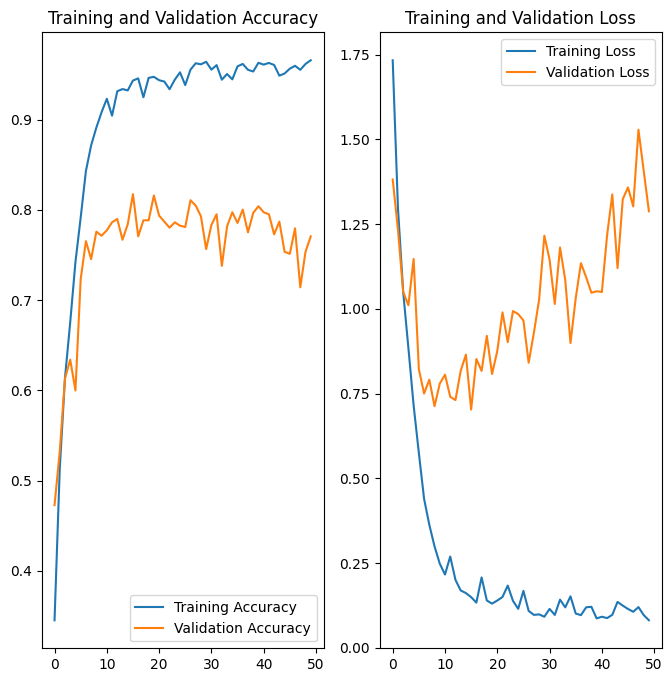

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



### Findings:

*   The training accuracy has improved from the 2nd model. It is now 96.57
*   Validation accuracy also improved from 2nd model. It is now 77.06
*   After rebalancing using Augmentation the classes are balanced & we are getting better results.
*   If more dataset is added we would certainly get better training & validation results.

Model 1: Vanilla Model
*   No Dropout Layers
*   List item
* Small Dataset and No Augmentation
* Model Training yeilded Non Accurate Model - Training accuracy 89% and Validation Accuracy 55%
* Model was Overfitting - This was due to no dropout layers and no data augmentation



Model 2: Model 1 + Dropout Layers + Data Augmentation
* Dropout Layers Added
* Data Augmentation was added
* Gap between Training Accuracy and Validation Accuracy decreased
* Accuracy is still low - Training Accuracy 83% and Validation Accuracy 53%


Model 3: Model 2 + Class balanced Dataset
* Dataset Added using Augmentor (500 images added per class) to counter class imbalance
* Same Model 2 was used.
* Model yeilded in 96% Training and 77% Validation Accuracy
* This model can be improved further by including more dataset for training sot hat it further learns the generaliziable features and performs better